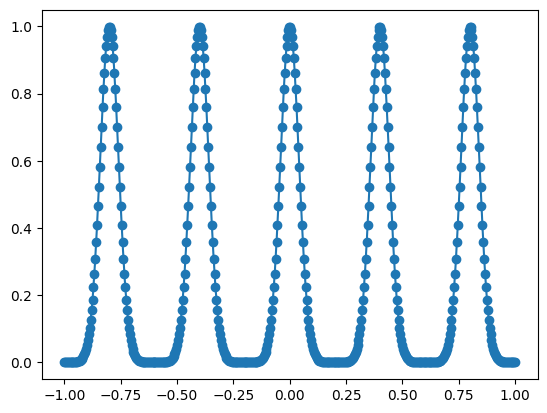

In [1]:
from kan import *
import numpy as np
import torch
import matplotlib.pyplot as plt


datasets = []

n_peak = 5
n_num_per_peak = 100
n_sample = n_peak * n_num_per_peak

x_grid = torch.linspace(-1,1,steps=n_sample)

x_centers = 2/n_peak * (np.arange(n_peak) - n_peak/2+0.5)

x_sample = torch.stack([torch.linspace(-1/n_peak,1/n_peak,steps=n_num_per_peak)+center for center in x_centers]).reshape(-1,)


y = 0.
for center in x_centers:
    y += torch.exp(-(x_grid-center)**2*300)

y_sample = 0.
for center in x_centers:
    y_sample += torch.exp(-(x_sample-center)**2*300)


plt.plot(x_grid.detach().numpy(), y.detach().numpy())
plt.scatter(x_sample.detach().numpy(), y_sample.detach().numpy())

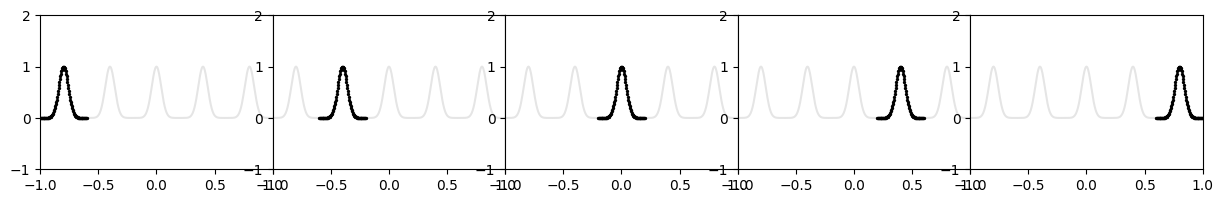

In [2]:
plt.subplots(1, 5, figsize=(15, 2))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(1,6):
    plt.subplot(1,5,i)
    group_id = i - 1
    plt.plot(x_grid.detach().numpy(), y.detach().numpy(), color='black', alpha=0.1)
    plt.scatter(x_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak].detach().numpy(), y_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak].detach().numpy(), color="black", s=2)
    plt.xlim(-1,1)
    plt.ylim(-1,2)

In [3]:
ys = []

# setting bias_trainable=False, sp_trainable=False, sb_trainable=False is important.
# otherwise KAN will have random scaling and shift for samples in previous stages

model = KAN(width=[1,1], grid=200, k=3, noise_scale=0.1, sp_trainable=False, sb_trainable=False, base_fun='zero')

for group_id in range(n_peak):
    dataset = {}
    dataset['train_input'] = x_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak][:,None]
    dataset['train_label'] = y_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak][:,None]
    dataset['test_input'] = x_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak][:,None]
    dataset['test_label'] = y_sample[group_id*n_num_per_peak:(group_id+1)*n_num_per_peak][:,None]
    model.fit(dataset, opt = 'LBFGS', steps=100, update_grid=False);
    y_pred = model(x_grid[:,None])
    ys.append(y_pred.detach().numpy()[:,0])

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.99e-06 | test_loss: 3.99e-06 | reg: 3.31e+00 | : 100%|█| 100/100 [00:05<00:00, 17.66


saving model version 0.1


| train_loss: 3.99e-06 | test_loss: 3.99e-06 | reg: 3.31e+00 | : 100%|█| 100/100 [00:04<00:00, 23.05


saving model version 0.2


| train_loss: 3.99e-06 | test_loss: 3.99e-06 | reg: 3.31e+00 | : 100%|█| 100/100 [00:04<00:00, 24.25


saving model version 0.3


| train_loss: 3.98e-06 | test_loss: 3.98e-06 | reg: 3.31e+00 | : 100%|█| 100/100 [00:04<00:00, 22.73


saving model version 0.4


| train_loss: 4.00e-06 | test_loss: 4.00e-06 | reg: 3.31e+00 | : 100%|█| 100/100 [00:03<00:00, 26.41


saving model version 0.5


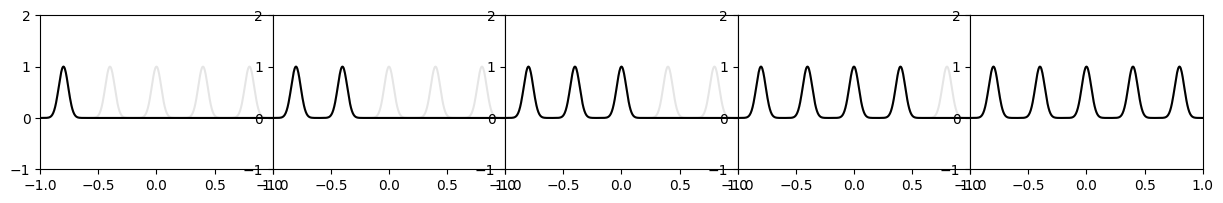

In [4]:
plt.subplots(1, 5, figsize=(15, 2))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(1,6):
    plt.subplot(1,5,i)
    group_id = i - 1
    plt.plot(x_grid.detach().numpy(), y.detach().numpy(), color='black', alpha=0.1)
    plt.plot(x_grid.detach().numpy(), ys[i-1], color='black')
    plt.xlim(-1,1)
    plt.ylim(-1,2)